## D208 - Predictive Modeling - PA1

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Load Data From medical_clean.csv

In [2]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


#### Start understanding data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [6]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Any Rows With Nulls?

In [7]:
print("Are there any rows with nulls: " + str(df.isnull().all(axis=1).any()))

Are there any rows with nulls: False


### Any Missing Values?

In [8]:
df.loc[:, df.isnull().any()]

""
0
1
2
3
4
...
9995
9996
9997
9998


---
##  **Part 1: Research Question:**
### [A1] **Question:** "Can the following three features (Initial Days, Readmission, and Diabetes) help predict total charges?"

---
### **Data Exploration**
---

#### Describe & Explore Numeric Fields:

In [9]:
#https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
# Describe Numeric Fields
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [10]:
# df_num = df.select_dtypes(include='number')
# df_num.head()
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


#### Describe & Explore Categorical Fields:

In [11]:
# Describe Categorical Fields
df.describe(include = ['O'])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [12]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


#### [B cont.] Create Subset Data Group to Focus On and Describe

In [13]:
df_num.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [14]:
df_cat.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'],
      dtype='object')

#### Prune Numerical Fields

#### Add Columns to Quantify Boolean Fields

In [15]:
pruned_df_num = df_num.drop(['CaseOrder', 'Population', 'Children', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp','Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
# Transform & Add Quantified Data Fields As Needed:
# pruned_df_num['Overweight_Num'] = df['Overweight'].eq('Yes').astype(int)
pruned_df_num['Diabetes_Num'] = df['Diabetes'].eq('Yes').astype(int)
pruned_df_num['ReAdmis_Num'] = df['ReAdmis'].eq('Yes').astype(int)
# pruned_df_num['Gender_Num'] = df['Gender'].eq('Male').astype(int)

pruned_df_num

,Age,Initial_days,TotalCharge,Additional_charges,Diabetes_Num,ReAdmis_Num
0,53,10.585770,3726.702860,17939.403420,1,0
1,51,15.129562,4193.190458,17612.998120,0,0
2,53,4.772177,2434.234222,17505.192460,1,0
3,78,1.714879,2127.830423,12993.437350,0,0
4,22,1.254807,2113.073274,3716.525786,0,0
...,...,...,...,...,...,...
9995,25,51.561220,6850.942000,8927.642000,0,0
9996,87,68.668240,7741.690000,28507.150000,1,1
9997,45,70.154180,8276.481000,15281.210000,0,1
9998,43,63.356900,7644.483000,7781.678000,0,1


#### Prune Categorical Fields

In [16]:
pruned_df_cat = df_cat.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', \
                             'Marital', 'ReAdmis', 'Diabetes', 'Overweight','Soft_drink', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'], axis=1)
pruned_df_cat

,Gender,Initial_admin,HighBlood,Stroke,Complication_risk,Arthritis,Hyperlipidemia,Services
0,Male,Emergency Admission,Yes,No,Medium,Yes,No,Blood Work
1,Female,Emergency Admission,Yes,No,High,No,No,Intravenous
2,Female,Elective Admission,Yes,No,Medium,No,No,Blood Work
3,Male,Elective Admission,No,Yes,Medium,Yes,No,Blood Work
4,Female,Elective Admission,No,No,Low,No,Yes,CT Scan
...,...,...,...,...,...,...,...,...
9995,Male,Emergency Admission,Yes,No,Medium,No,No,Intravenous
9996,Male,Elective Admission,Yes,No,Medium,Yes,No,CT Scan
9997,Female,Elective Admission,Yes,No,High,No,No,Intravenous
9998,Male,Emergency Admission,No,No,Medium,No,No,Blood Work


#### Plot Data

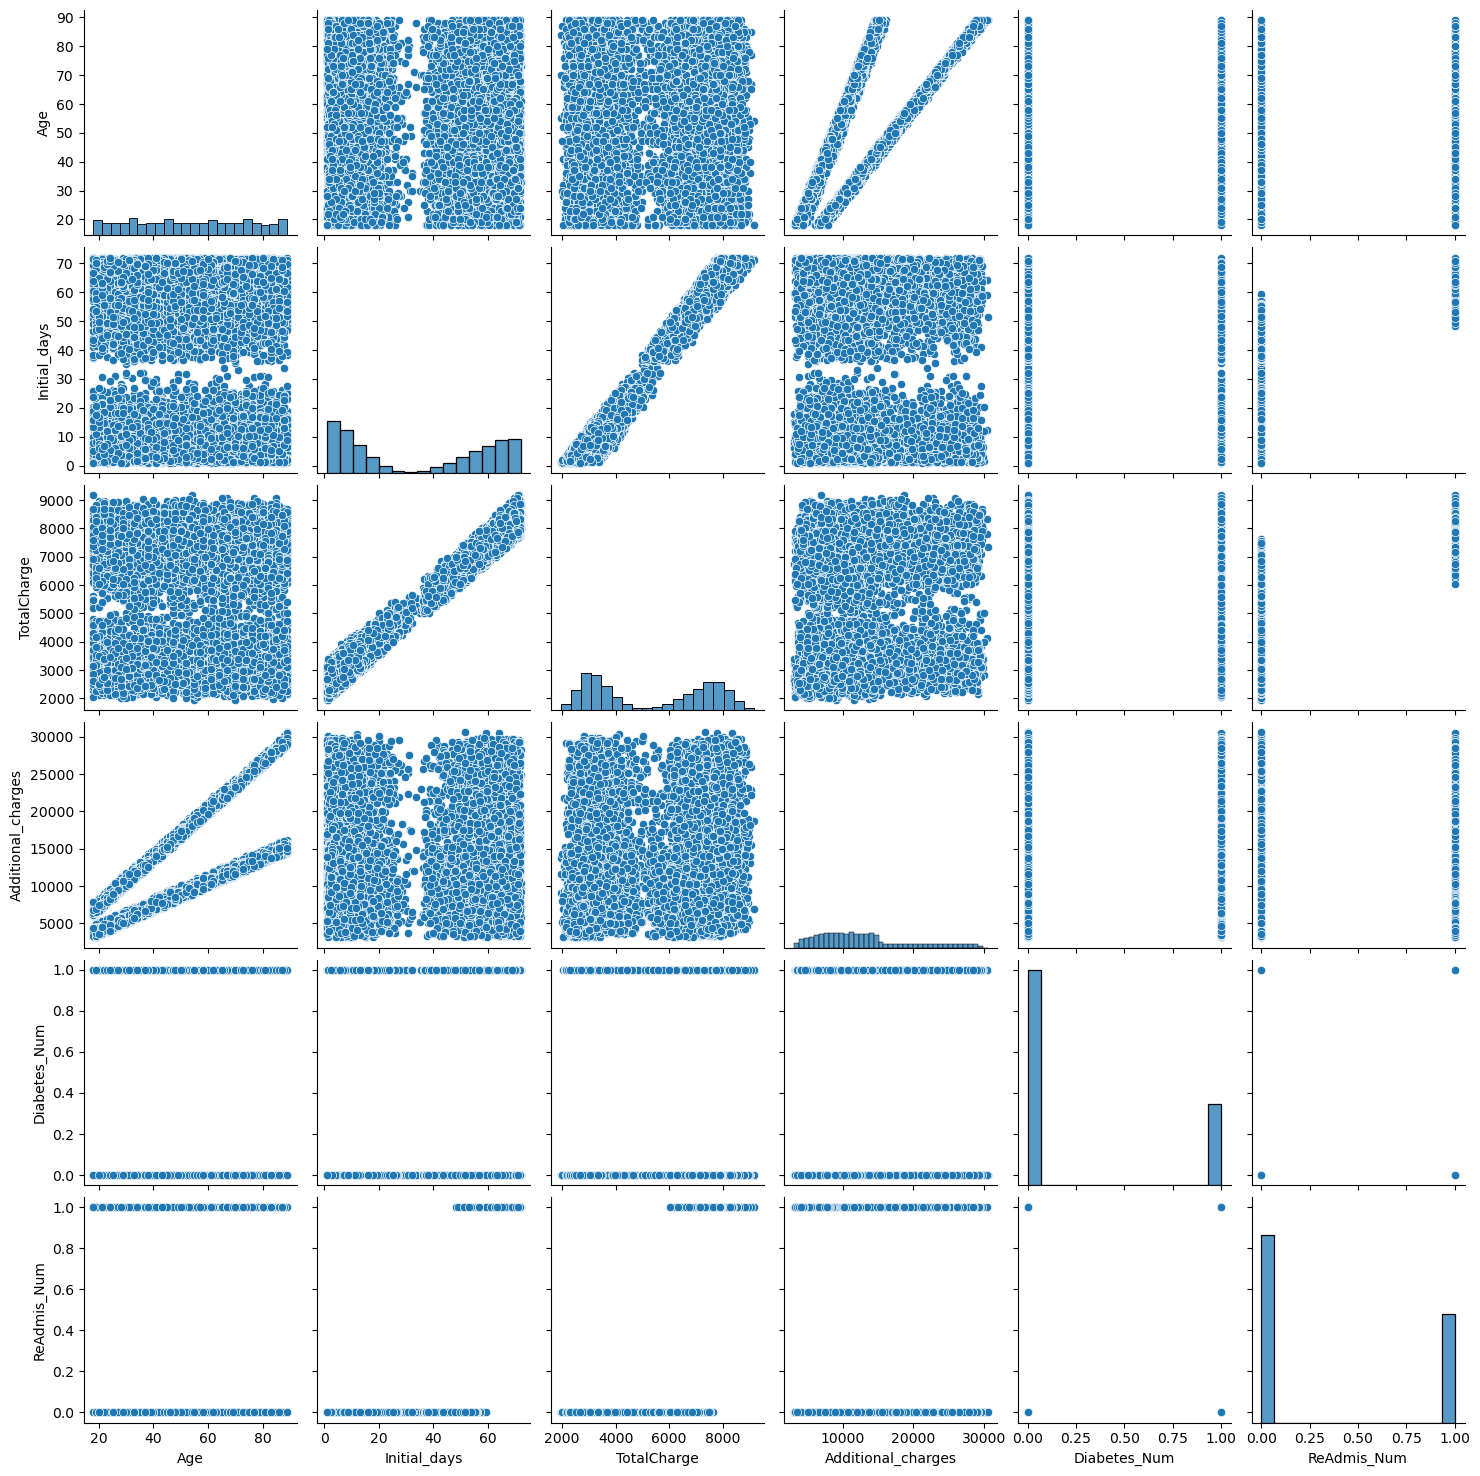

In [17]:
sns.pairplot(pruned_df_num);

### Univariate Analysis

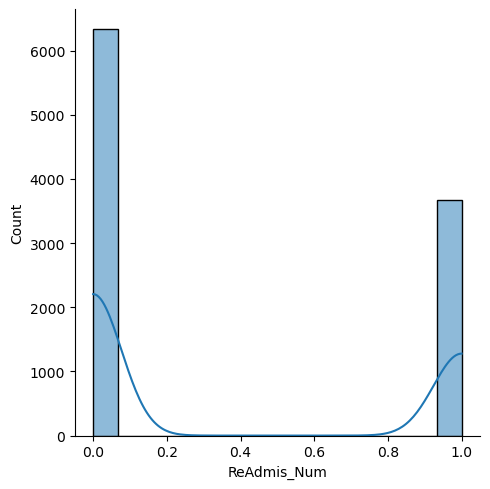

In [18]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
# Distribution of Total Charge
sns.displot(data=pruned_df_num, 
            x='ReAdmis_Num', 
            kde=True);

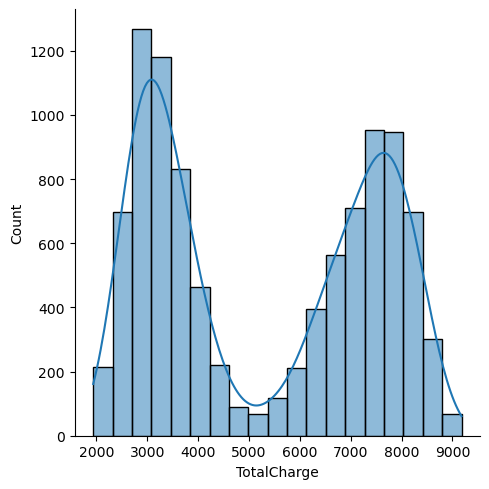

In [19]:
sns.displot(data=pruned_df_num, 
            x='TotalCharge', 
            kde=True);

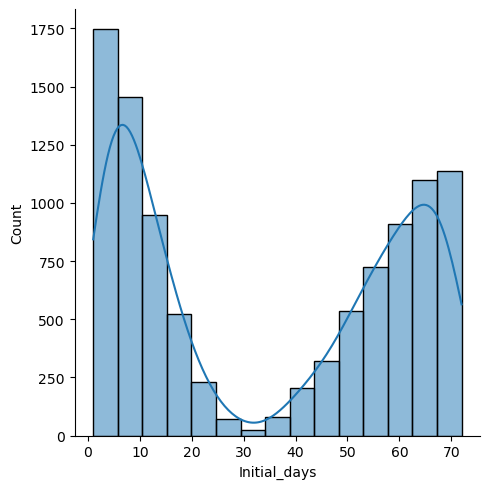

In [20]:
# Distribution of Total Charge
sns.displot(data=pruned_df_num, 
            x='Initial_days', 
            kde=True);

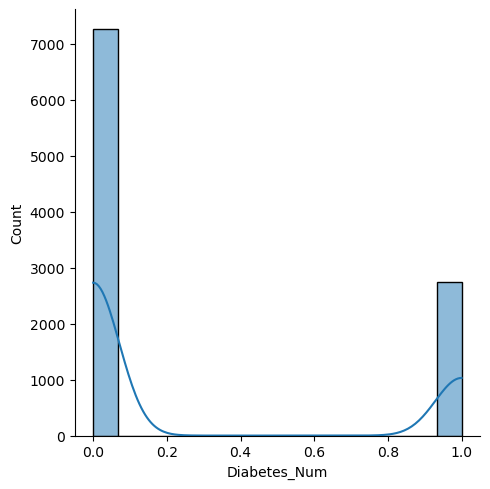

In [21]:
# Distribution of Total Charge
sns.displot(data=pruned_df_num, 
            x='Diabetes_Num', 
            kde=True);

#### Bivariate Analysis

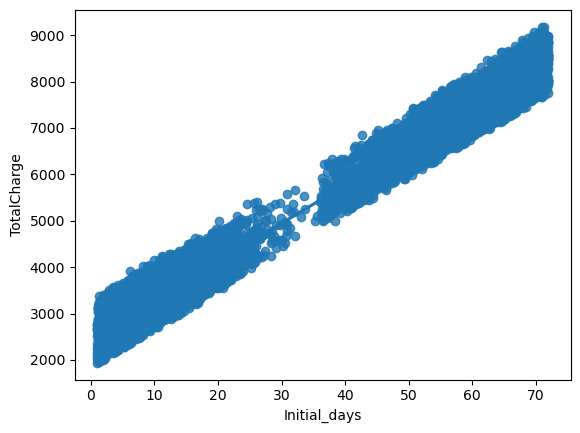

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x="Initial_days", 
            y="TotalCharge", 
            data=pruned_df_num, 
            ci=None);
plt.show()

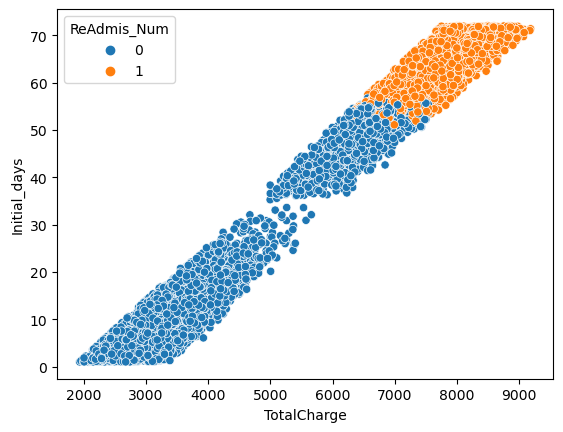

In [23]:
sns.scatterplot(x='TotalCharge',
               y='Initial_days',
               data=pruned_df_num,
               hue='ReAdmis_Num');

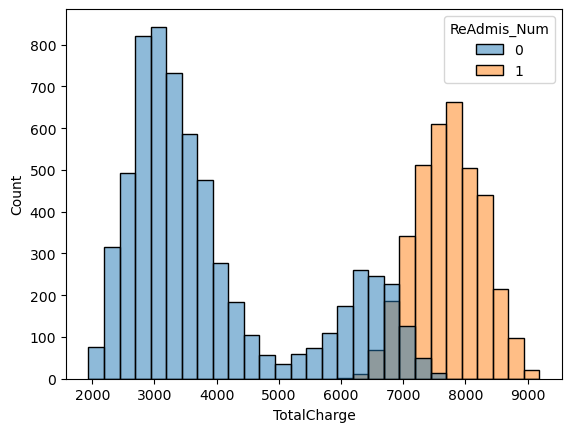

In [24]:
sns.histplot(hue="ReAdmis_Num", x="TotalCharge", binwidth=250, data=pruned_df_num);
plt.show()

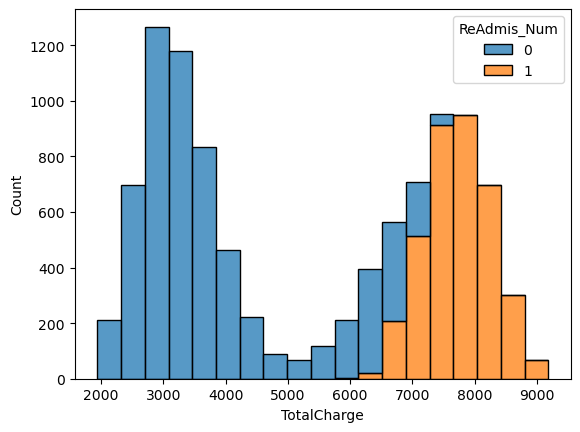

In [25]:
sns.histplot(hue="ReAdmis_Num", x="TotalCharge", multiple="stack", data=pruned_df_num);
plt.show()

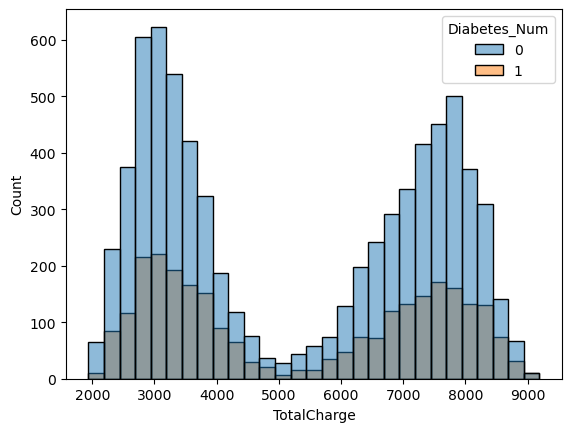

In [26]:
sns.histplot(hue="Diabetes_Num", x="TotalCharge", binwidth=250, data=pruned_df_num);
plt.show()

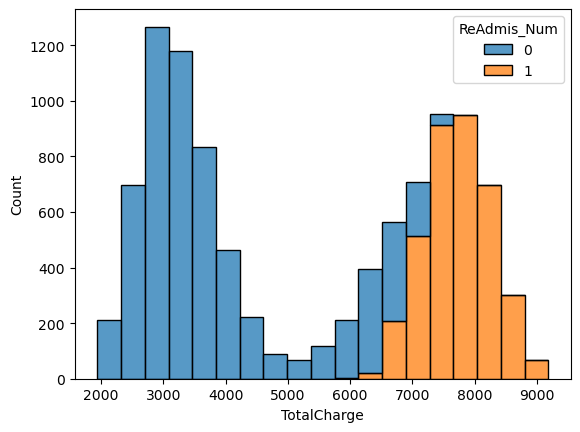

In [27]:
sns.histplot(hue="ReAdmis_Num", x="TotalCharge", multiple="stack", data=pruned_df_num);
plt.show()

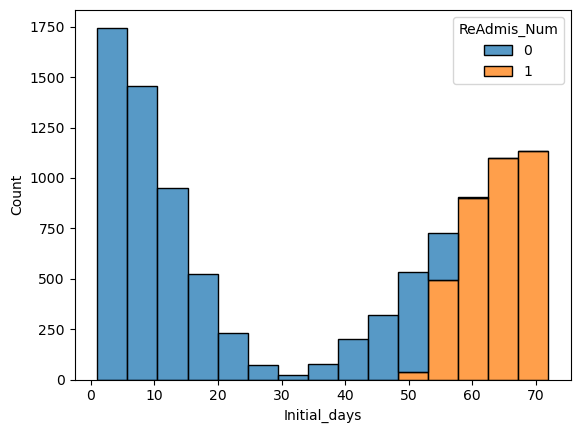

In [28]:
sns.histplot(hue="ReAdmis_Num", x="Initial_days", multiple="stack", data=pruned_df_num);
plt.show()

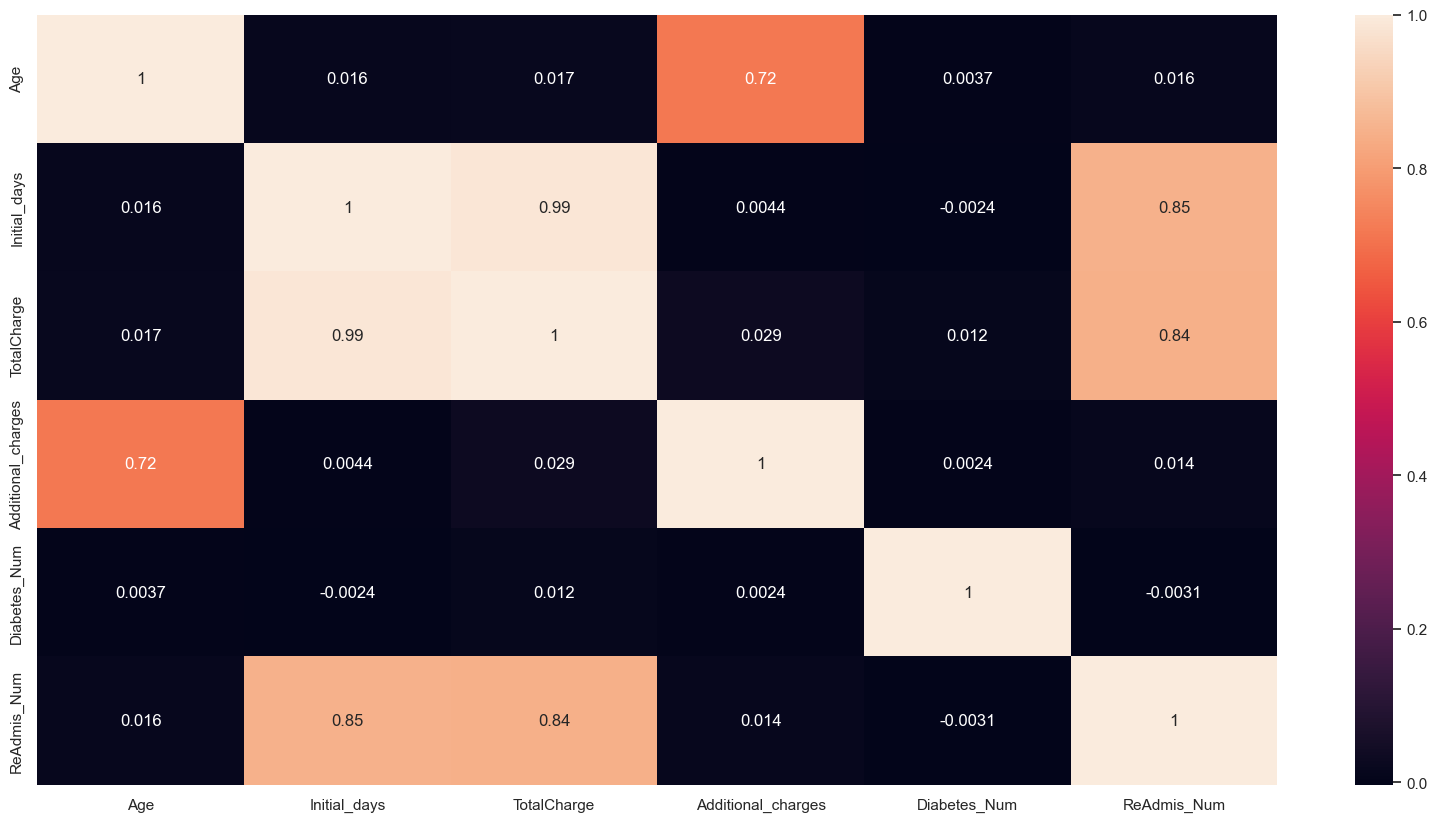

In [29]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(pruned_df_num.corr(), annot=True);

## Regression Model w/Most Terms - Compare to p-value

In [30]:
# 90% Train, 10% Test
X = df_num.drop(['TotalCharge'], axis=1)  

y = pruned_df_num['TotalCharge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [31]:
# Look into Stats Models w/p values
X_train2 = sm.add_constant(X_train)

model = sm.OLS(y_train,X_train2)

print(model.fit().summary())

p_vals = dict(model.fit().pvalues[1:])

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.323e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:57:29   Log-Likelihood:                -50607.
No. Observations:                7000   AIC:                         1.013e+05
Df Residuals:                    6977   BIC:                         1.014e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2406.3630     71

#### Prune Based On P-Value and Hypothesis Question

In [32]:
# list comprehension --> Verify Fields < 0.05 p-value
[key for key in p_vals.keys() if p_vals[key] < 0.05]

['Age', 'Initial_days', 'Additional_charges']

In [33]:
# pruned_df_num = pruned_df_num.drop(['Overweight_Num', 'Gender_Num'], axis=1)
pruned_df_num.columns

Index(['Age', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Diabetes_Num', 'ReAdmis_Num'],
      dtype='object')

In [34]:
pruned_df_num.head()

,Age,Initial_days,TotalCharge,Additional_charges,Diabetes_Num,ReAdmis_Num
0,53,10.585770,3726.702860,17939.403420,1,0
1,51,15.129562,4193.190458,17612.998120,0,0
2,53,4.772177,2434.234222,17505.192460,1,0
3,78,1.714879,2127.830423,12993.437350,0,0
4,22,1.254807,2113.073274,3716.525786,0,0


#### Multiple Regression Model Run Again

In [35]:
# 90% Train, 10% Test
# X = pruned_df_num.drop(['TotalCharge'], axis=1)
# USE Hypothesis Predictors
X = pruned_df_num[['Age', 'Initial_days', 'Additional_charges','ReAdmis_Num', 'Diabetes_Num']]

y = pruned_df_num['TotalCharge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [36]:
# Look into Stats Models w/p values
X_train2 = sm.add_constant(X_train)

model02 = sm.OLS(y_train,X_train2)

print(model02.fit().summary())

p_vals = dict(model02.fit().pvalues[1:])

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 5.902e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:57:29   Log-Likelihood:                -50569.
No. Observations:                7000   AIC:                         1.012e+05
Df Residuals:                    6994   BIC:                         1.012e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2461.0510     12

In [37]:
# list comprehension --> Verify Fields < 0.05 p-value
[key for key in p_vals.keys() if p_vals[key] < 0.05]

['Age', 'Initial_days', 'Additional_charges', 'ReAdmis_Num', 'Diabetes_Num']

---
### **Part IV: Model Comparison and Analysis**
---

#### Train | Test | Split

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
pruned_df_num.columns

Index(['Age', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Diabetes_Num', 'ReAdmis_Num'],
      dtype='object')

In [40]:
# X = pruned_df_num.drop('TotalCharge', axis=1) # Everything 'but'
# y = pruned_df_num['TotalCharge']

In [41]:
# 90% Train, 10% Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
print(lm.intercept_)

2461.0510427290787


In [44]:
# List coefficients relating to each feature in our dataset
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Age,-3.617354
Initial_days,81.022694
Additional_charges,0.016543
ReAdmis_Num,51.212723
Diabetes_Num,77.934007


In [45]:
lm.coef_

array([-3.61735397e+00,  8.10226940e+01,  1.65428450e-02,  5.12127226e+01,
        7.79340070e+01])

In [46]:
# Each coeficients from X_train above
X_train.columns

Index(['Age', 'Initial_days', 'Additional_charges', 'ReAdmis_Num',
       'Diabetes_Num'],
      dtype='object')

## Model Predictions

In [47]:
predictions = lm.predict(X_test)
predictions

array([3803.88627685, 3292.77655045, 7773.91401581, ..., 7930.63809981,
       8434.66756507, 3113.39395265])

In [48]:
# Measure of fit
lm.score(X_test, y_test)

0.9769194574255485

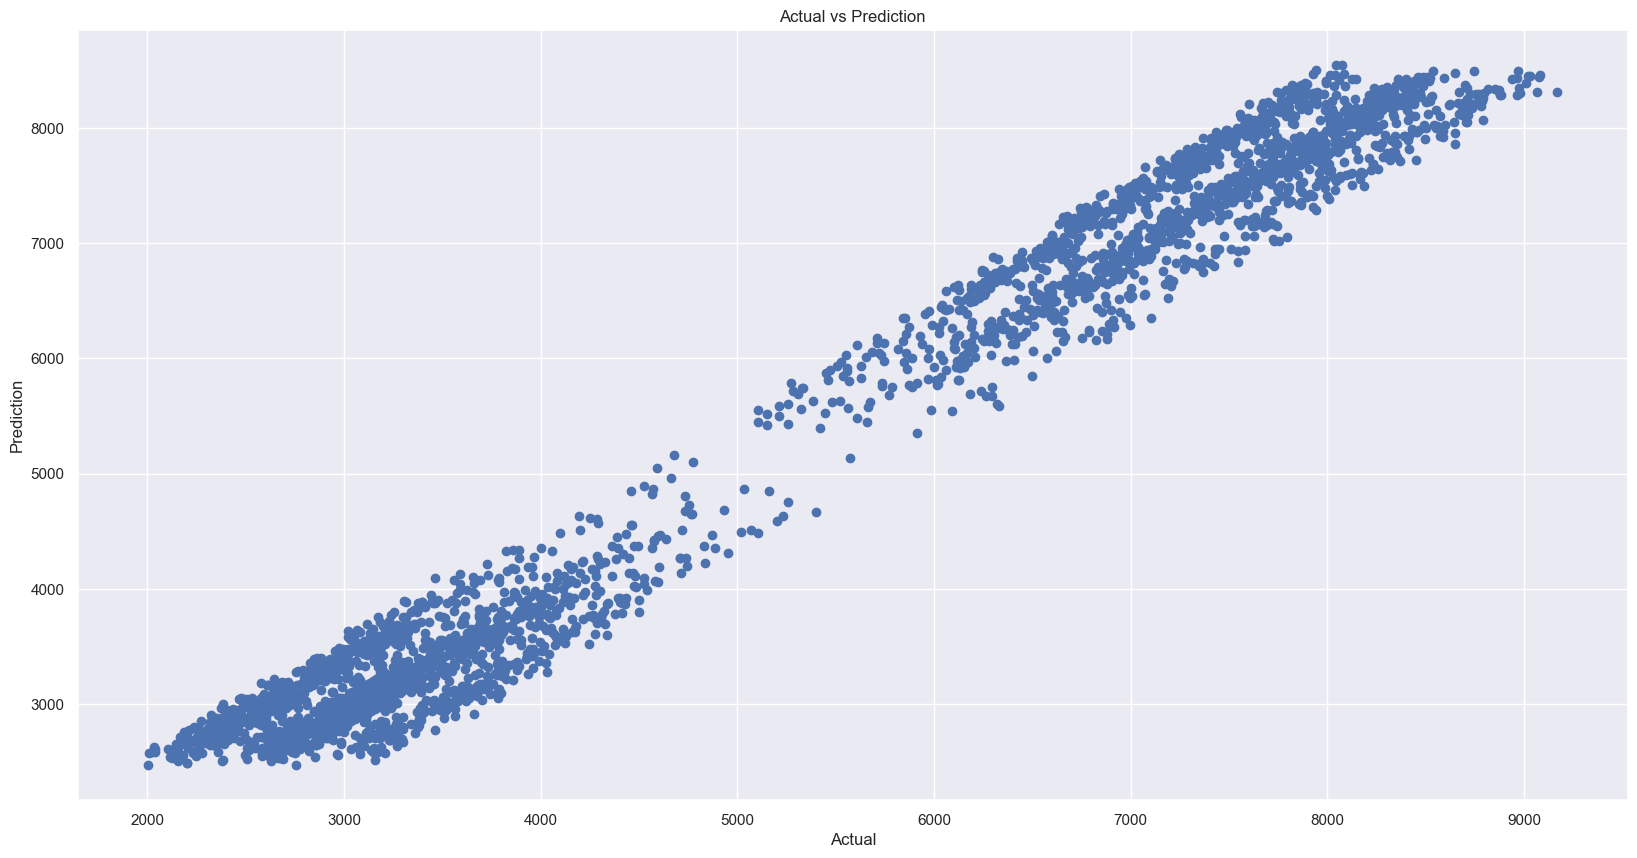

In [49]:
plt.scatter(y_test, predictions);
plt.title("Actual vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction");

## Regression Evaluation Metrics

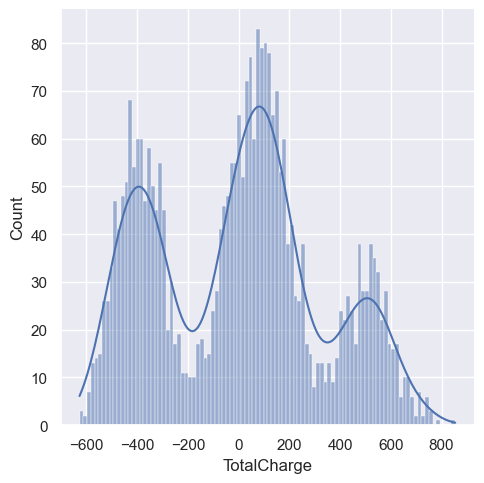

In [50]:
sns.displot(data=(y_test-predictions), bins=100, kde=True);

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 271.844754051452
MSE: 109256.26995173047
RMSE: 330.5393621820713


In [52]:
# Average Total Cost
df['TotalCharge'].mean()

5312.1727687502

In [53]:
# R squared
print('R Squared:', metrics.r2_score(y_test, predictions))

R Squared: 0.9769194574255485
